# Clustering

## Preparing the Environment

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
# Import user-defined modules
import sys
from pathlib import Path
SRC_DIR = Path.cwd().parent / "src"
sys.path.append(str(SRC_DIR))

import data_utils

# Set global variables
RAW_DATA_DIR, PROCESSED_DATA_DIR = data_utils.get_data_directories()

Data directories successfully set.


### Loading the Dataset

In [19]:
data = pd.read_csv(f"{PROCESSED_DATA_DIR}/scaled_encoded_global_dataset.csv")

## K-Means

We used K-means clustering to identify localization of data in clusters. We used both elbow method and silhouette method in identifying the proper number of clusters.

In [34]:
def evaluate_kmeans(X, max_k=10, random_state=42):
    inertia_scores = []
    silhouette_scores = []

    K_range = range(2, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(X)

        inertia_scores.append(kmeans.inertia_)  # Elbow method
        silhouette_avg = silhouette_score(X, kmeans.labels_)  # Silhouette score
        silhouette_scores.append(silhouette_avg)

        print(f"k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_avg:.3f}")

    return K_range, inertia_scores, silhouette_scores

In [35]:
def plot_k_evaluation(K_range, inertia_scores, silhouette_scores):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Elbow Method
    ax[0].plot(K_range, inertia_scores, marker='o')
    ax[0].set_title('Elbow Method')
    ax[0].set_xlabel('Number of clusters (k)')
    ax[0].set_ylabel('Inertia (Sum of Squared Distances)')
    ax[0].grid(True)

    # Silhouette Score
    ax[1].plot(K_range, silhouette_scores, marker='o', color='green')
    ax[1].set_title('Silhouette Scores')
    ax[1].set_xlabel('Number of clusters (k)')
    ax[1].set_ylabel('Average Silhouette Score')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

As you can see here, with the elbow method, the inertia decreases without a clear representation of an "elbow". This hints that there might not be clusters within our data. Additionally, looking at Silhouette scores as as we increase the number of clusters, score is the highes

k=2, Inertia=9492.70, Silhouette=0.069
k=3, Inertia=8992.86, Silhouette=0.063
k=4, Inertia=8639.87, Silhouette=0.060
k=5, Inertia=8304.65, Silhouette=0.064
k=6, Inertia=8027.23, Silhouette=0.064
k=7, Inertia=7842.40, Silhouette=0.062
k=8, Inertia=7648.13, Silhouette=0.063
k=9, Inertia=7445.07, Silhouette=0.065
k=10, Inertia=7301.29, Silhouette=0.065


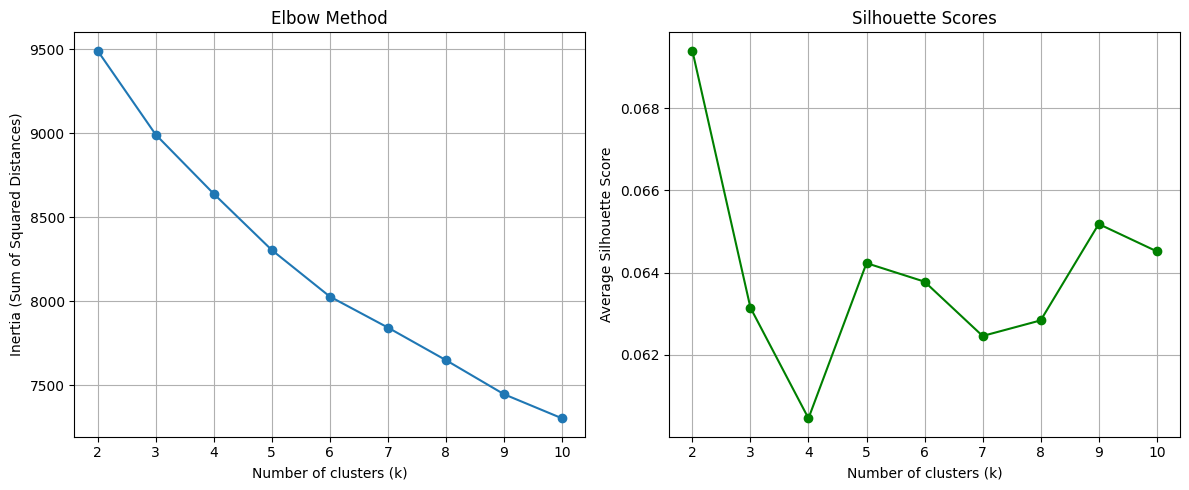

In [36]:
# Assuming X_final is your scaled, one-hot-encoded, fully prepared dataset
K_range, inertia_scores, silhouette_scores = evaluate_kmeans(X_final, max_k=10)

# Visualize the results
plot_k_evaluation(K_range, inertia_scores, silhouette_scores)
